In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

## References
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0020095
https://people.ece.cornell.edu/atang/pub/15/PLOS_One.pdf

# Load Global network of 277 neurons (zip) dataset from [[kraiser et al. 2006]](http://www.biological-networks.org/pubs/suppl/Kaiser2006.html)

In [3]:
nodes_labels = pd.read_csv("celegans277labels.csv", header=None) 
adjacency = pd.read_csv("celegans277matrix.csv", header=None)
locations = pd.read_csv("celegans277positions.csv", header=None)
adjacency.index = nodes_labels[0] 
adjacency.columns = nodes_labels[0]
locations.index = nodes_labels[0]
inter_neuron_dist = pd.DataFrame(pairwise_distances(locations))
inter_neuron_dist.columns = nodes_labels[0]
inter_neuron_dist.index = nodes_labels[0]

In [4]:
inter_neuron_dist.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,0.004850,0.005171,0.005157,0.071657,0.072781,0.074034,0.074281,0.075752,0.075708,...,0.879595,0.925826,0.045768,0.148903,0.233522,0.327535,0.418788,0.500684,0.608913,0.700111
ADAR,0.004850,0.000000,0.004004,0.007141,0.068261,0.069283,0.070109,0.070422,0.072290,0.072327,...,0.882789,0.928948,0.050171,0.152795,0.237204,0.331086,0.422265,0.504087,0.612279,0.703425
ADEL,0.005171,0.004004,0.000000,0.003873,0.066492,0.067626,0.068987,0.069209,0.070593,0.070543,...,0.884763,0.930989,0.050632,0.154001,0.238665,0.332695,0.423954,0.505854,0.614083,0.705282
ADER,0.005157,0.007141,0.003873,0.000000,0.068233,0.069470,0.071290,0.071439,0.072392,0.072258,...,0.883429,0.929726,0.048178,0.152003,0.236869,0.331023,0.422350,0.504321,0.612584,0.703832
ADFL,0.071657,0.068261,0.066492,0.068233,0.000000,0.002372,0.012054,0.010565,0.004296,0.004070,...,0.951023,0.997134,0.116032,0.220199,0.305094,0.399184,0.490444,0.572320,0.680529,0.771686


In [5]:
locations.head()

,0,1
0,,
ADAL,0.011068,0.005903
ADAR,0.014206,0.002204
ADEL,0.016233,0.005657
ADER,0.014941,0.009308
ADFL,0.082393,-0.000984


In [6]:
adjacency.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAR,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADEL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADFL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot network

In [7]:
def plot_connectome_scale():
    plt.figure(figsize=(14,1))
    plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
    #plt.savefig("connectome_scale.pdf")

def plot_connectome():
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,12))
    for i,row in enumerate(adjacency.values):
        for j,columns in enumerate(row):
            if columns == 1:
                xs = [locations.values[i,0],locations.values[j,0]]
                ys = [locations.values[i,1],locations.values[j,1]]
                plt.plot(xs,ys,color="red",alpha=0.03)
    plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Posterior - Anterior(mm)",fontsize=30)
    plt.ylabel("Dorsal - Ventral(mm)",fontsize=30)
    #plt.savefig("connectome.pdf")
    #plt.figure(figsize=(14,1))
    #plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
    #plt.savefig("connectome_scale.pdf")

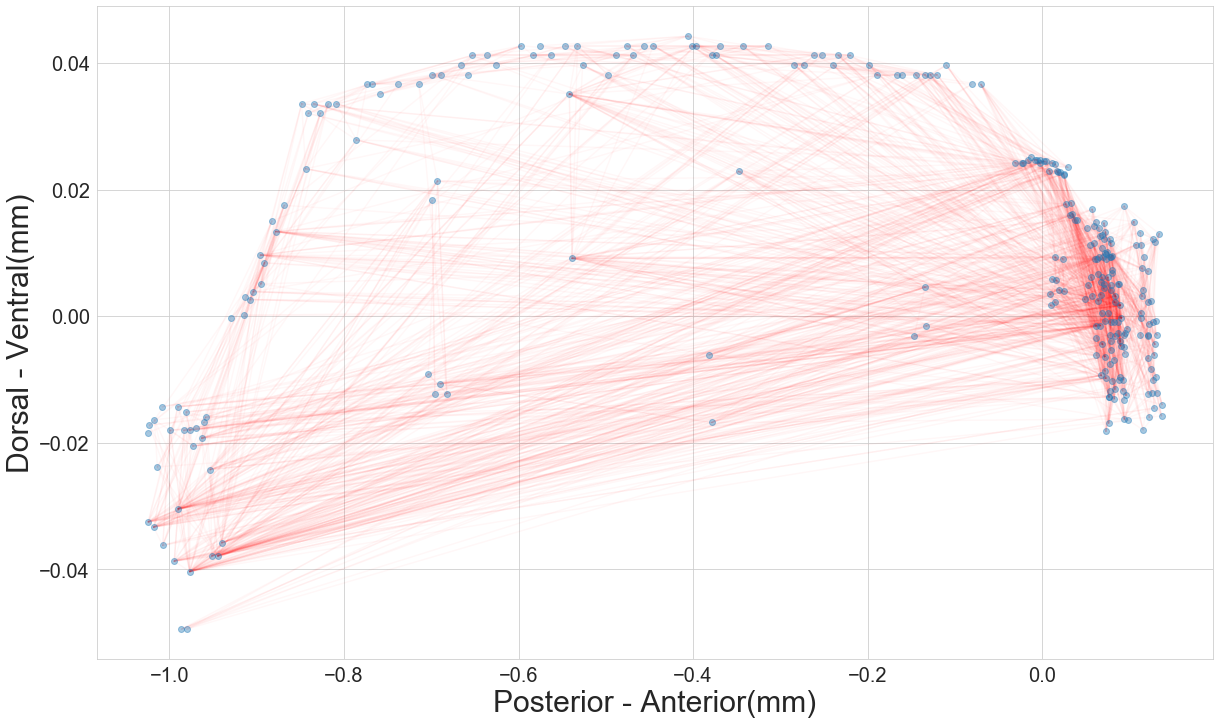

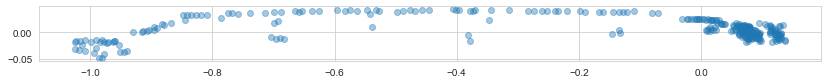

In [8]:
plot_connectome()
plot_connectome_scale()

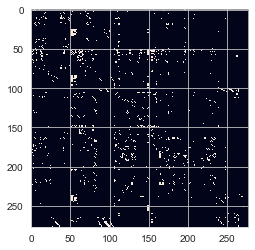

In [9]:
plt.imshow(adjacency)

Pas de symétrie, peu de point blancs $\to$ matrice creuse

In [10]:
in_degree = adjacency.sum(axis=0)

In [11]:
out_degree = adjacency.sum(axis=1)

Text(0, 0.5, 'frequency')

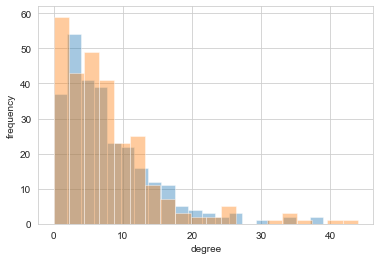

In [12]:
plt.hist(in_degree, alpha=0.4,bins=20) #blue
plt.hist(out_degree, alpha=0.4,bins=20) #orange
plt.xlabel("degree")
plt.ylabel("frequency")

# Networkx

In [13]:
link_list=[]
for row in adjacency.index:
    for col in adjacency.columns:
        if adjacency.loc[row,col]!=0:
            link_list.append([row,col, inter_neuron_dist.loc[row,col]])
len(link_list)

2105

In [14]:
df = pd.DataFrame(link_list, columns=["input", "output", "weight"])
df

,input,output,weight
0,ADAL,ADEL,0.005171
1,ADAL,ADFL,0.071657
2,ADAL,AIAL,0.054218
3,ADAL,AWAL,0.067481
4,ADAL,PVPL,0.906806
...,...,...,...
2100,VD9,DB6,0.030530
2101,VD9,DB7,0.139014
2102,VD9,DD5,0.079375
2103,VD9,VA9,0.025985


/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


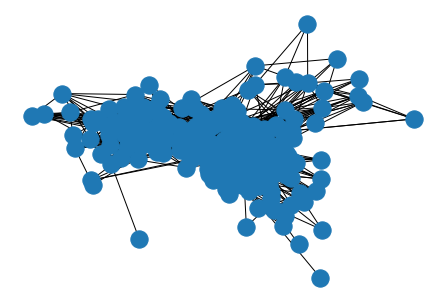

In [16]:
import networkx as nx
g = nx.from_pandas_edgelist(df, "input", "output", "weight")
nx.draw(g)

/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


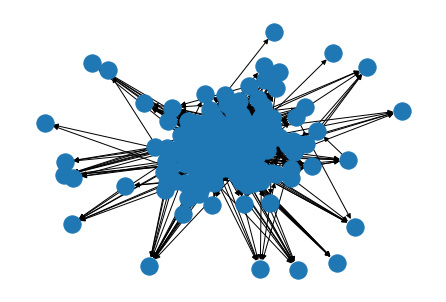

In [17]:
g2 = nx.from_pandas_edgelist(df, "input", "output", "weight", create_using=nx.DiGraph())
nx.draw(g2)

In [18]:
list(g2.nodes())[:10]

['ADAL',
 'ADEL',
 'ADFL',
 'AIAL',
 'AWAL',
 'PVPL',
 'RMGL',
 'ADAR',
 'ADER',
 'ADFR']

In [19]:
list(g2.edges())[:10]

[('ADAL', 'ADEL'),
 ('ADAL', 'ADFL'),
 ('ADAL', 'AIAL'),
 ('ADAL', 'AWAL'),
 ('ADAL', 'PVPL'),
 ('ADAL', 'RMGL'),
 ('ADEL', 'ADER'),
 ('ADEL', 'BDUL'),
 ('ADEL', 'BDUR'),
 ('ADEL', 'FLPL')]

In [20]:
list(g2.neighbors("ADAL")) 

['ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL']

In [21]:
g2.get_edge_data("ADAL", "ADFL")

{'weight': 0.07165668764714148}

# Network motifs

### Definition
A network motif can be defined as a subgraph (ie. small patterns of interconnections) that repeat itself in a given graph.
They are occurring in complex networks at numbers that are significantly higher than those in randomized networks.

### Most important motifs in this dataset


feed forward loop, bi-fan, bi-parallel

### Roles

###  Algorithms

Feed forward loop

In [22]:
def feed_forward(g):
    res = 0
    for n in g.nodes():
        for i in g.neighbors(n):
            for j in g.neighbors(i):
                if j in g.neighbors(n):
                    res += 1
    return res

In [23]:
def feed_forward(g):
    res = 0
    for n in g.nodes():
        n1 =  list(g.neighbors(n))
        for i in n1:
            n2 = list(g.neighbors(i))
            res += len(set(n2).intersection(set(n1)))
    return res

In [24]:
feed_forward(g2)

3776

Ici, on recherche le pattern mais pas de manière exclusive, ie on ne se préoccupe pas du fait que les noeuds du pattern peuvent être connectés à d autre noeuds

Bi-fan loop

In [25]:
from scipy.special import binom
def bi_fan(g):
    counts = 0
    nodes = list(g.nodes())
    for i,n1 in enumerate(nodes):
        for n2 in nodes[i+1:]:
            neighbors_n1 = set(list(g.neighbors(n1))).difference([n1,n2])
            neighbors_n2 = set(list(g.neighbors(n2))).difference([n1,n2])
            nb_common_neighbors = len(neighbors_n1.intersection(neighbors_n2))
            counts += binom(nb_common_neighbors,2)
    return(counts)

In [26]:
def bi_fan(g):
    res = 0
    i = 0
    j = 0
    nodes = list(g.nodes())
    for i,n1 in enumerate(nodes): #(ie a on figure 6)
        neighbors_n1 = list(g.neighbors(n1))
        for n2 in nodes[i+1:]: #(ie c on figure 6)
            neighbors_n2 = list(g.neighbors(n2))
            for j,v1 in enumerate(neighbors_n1): #(ie b on figure 6)
                for v2 in neighbors_n1[j+1:]: #(ie d on figure 6)
                    if ((v1 in neighbors_n2) and (v2 in neighbors_n2)):
                        res += 1
            
    return res

In [27]:
bi_fan(g2)

14232

In [28]:
def bi_parallel(g):
    counts = 0
    nodes = list(g.nodes())
    for n1 in nodes:
        for n2 in nodes:
            if n1 != n2:
                children_n1 = set(g.successors(n1)).difference([n1,n2])
                parents_n2 = set(g.predecessors(n2)).difference([n1,n2])
                nb_common_parents_children = len(children_n1.intersection(parents_n2))
                counts += binom(nb_common_parents_children,2)
    return(counts)

In [29]:
def bi_parallel(g):
    res = 0
    i = 0
    for n in g.nodes(): # (ie a on figure 6)
        neighbors_n = list(g.neighbors(n))
        for i,v1 in enumerate(neighbors_n): #(ie b on figure 6)
            for v2 in neighbors_n[i+1:]: #(ie c on figure 6)
                for w in list(g.neighbors(v1)):
                    if w in list(g.neighbors(v2)):
                        if w != v1 and w != v2 and w != n:
                            res += 1
    return res             

In [30]:
bi_parallel(g2)

17827

# Rich Club Neurons

### Rich club coefficient
For a integer $k$, the rich-club coefficient is equal to the number of edges $|E_k|$ between nodes $V_k = \{v \in V \; | \; deg(v)\geq k\}$, divided by the number of potential edges between nodes $V_k$:

$$\phi(k) = \frac{2 |E_k|}{|V_k|(|V_k| - 1)}$$

The `networkx` implementation allows to normalize the coefficient by the value $\phi_{rand}(k)$ obtained for randomized versions of the network.

In [32]:
from networkx.algorithms import rich_club_coefficient
rcc = rich_club_coefficient(g2.to_undirected(),normalized=True)
rcc = pd.Series(rcc)

Text(0, 0.5, '$\\phi(k)/\\phi_{rand}(k)$')

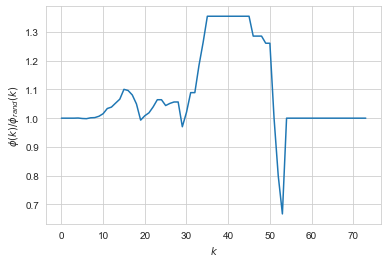

In [33]:
plt.plot(rcc)
plt.xlabel("$k$")
plt.ylabel("$\phi(k)/\phi_{rand}(k)$")

In [34]:
rcc[rcc>1.2]

34    1.264706
35    1.354839
36    1.354839
37    1.354839
38    1.354839
39    1.354839
40    1.354839
41    1.354839
42    1.354839
43    1.354839
44    1.354839
45    1.354839
46    1.285714
47    1.285714
48    1.285714
49    1.260870
50    1.260870
dtype: float64

Here when $k=35$ we have $\phi(k) >1.2$, thus our rich club here contains all the nodes with a degree larger than 35

In [35]:
undirected_degrees = pd.Series(dict(g.degree()))
rich_club = list(undirected_degrees[undirected_degrees>35].index)
perif = list(set(g.nodes).difference(rich_club))
g_rich = g.subgraph(rich_club)
g_perif = g.subgraph(perif)

In [36]:
rich_club

['AVAR',
 'AVAL',
 'DVA',
 'PVCR',
 'AVBL',
 'AVBR',
 'AVDL',
 'AVDR',
 'AVEL',
 'AVER',
 'PVCL']

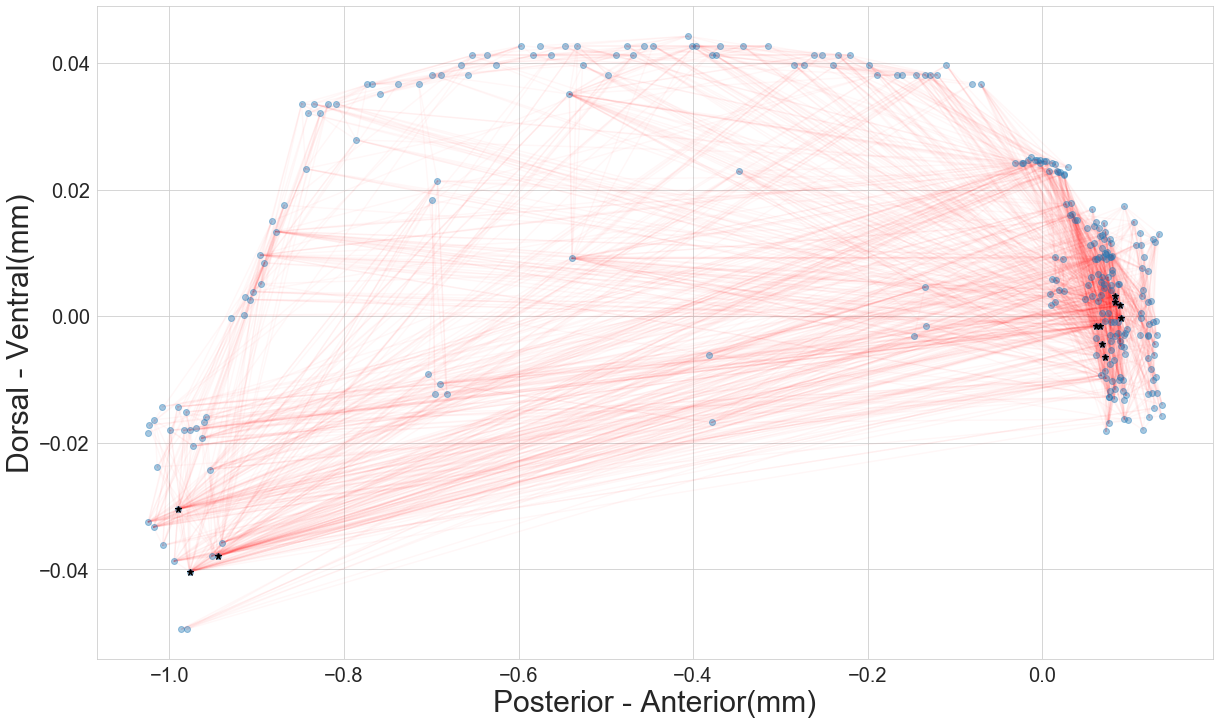

In [148]:
rich_neurons_locations = locations.loc[rich_club]
plot_connectome()
plt.plot(rich_neurons_locations[0],rich_neurons_locations[1],"*k",markersize=7)

### Connection distance

The connection distance is simply the 2D Euclidean distance between the connected neurons, it is an approximation of the axonal connection distance (a.k.a. wiring cost).


In [61]:
def compute_pairwise_measure(G,measure):
    res = []
    nodes = list(G.nodes)
    for i, u in enumerate(nodes[:-1]):
        for j,v in enumerate(nodes[i+1:]):
            try:
                res.append(measure(G,u,v))
            except:
                pass  
    return(res)

In [39]:
from networkx.algorithms import average_shortest_path_length
average_shortest_path_length(g,"weight"),average_shortest_path_length(g)

(0.461395186117405, 2.6388845288547063)

In [40]:
average_shortest_path_length(g_rich,"weight"),average_shortest_path_length(g_rich)

(0.467344983507473, 1.2363636363636363)

In [45]:
from networkx.algorithms import connected_components
for g_p in connected_components(g_perif):
    print(len(g_p))
    print(average_shortest_path_length(g.subgraph(g_p),"weight"),
    average_shortest_path_length(g.subgraph(g_p)))

264
0.46046513782360654 3.1022871298536696
2
0.030675006585166652 1.0


In [62]:
from networkx.algorithms.shortest_paths import shortest_path_length

def shortest_path_length_(G,u,v):
    return(shortest_path_length(G,u,v,weight="weight"))

shortest_path_rich = compute_pairwise_measure(g_rich,shortest_path_length_)
shortest_path_perif = compute_pairwise_measure(g_perif,shortest_path_length_)
shortest_path_g = compute_pairwise_measure(g,shortest_path_length_)


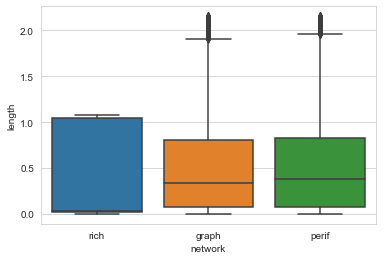

In [66]:
lengths = shortest_path_rich+shortest_path_perif+shortest_path_g
ids = ["rich" for i in shortest_path_rich]+\
      ["graph" for i in shortest_path_g]+\
      ["perif" for i in shortest_path_perif]

df = pd.DataFrame({"length":lengths,"network":ids})
sns.boxplot(data=df,x="network",y="length")

### Network efficiency

The __global efficiency__ $F$ of a network $G = \langle V,E \rangle$ is the the average of the inverse of the shortest paths distances between nodes.

$F(G) = \frac{1}{|V|(|V|-1)} \times \sum_{i\neq j \in V} \frac{1}{d(i,j)}$

The __local efficiency__ $f$ of a graph is simply the average of the global efficiency of the subgraph induced by the neighbors of node $v$, for each node $v\in V$.

In [67]:
from networkx.algorithms import global_efficiency,local_efficiency
loc_eff_rich = local_efficiency(g_rich)
loc_eff_perif = local_efficiency(g_perif)
loc_eff_g = local_efficiency(g)

glob_eff_rich = global_efficiency(g_rich)
glob_eff_perif = global_efficiency(g_perif)
glob_eff_g = global_efficiency(g)

In [68]:
loc_eff_rich,loc_eff_perif,loc_eff_g

(0.903823953823954, 0.41310507054952134, 0.48209744414345657)

In [69]:
glob_eff_rich,glob_eff_perif,glob_eff_g

(0.8818181818181818, 0.3612295563706497, 0.42094734822695795)

In [70]:
from networkx.algorithms import efficiency

eff_rich = compute_pairwise_measure(g_rich,efficiency)
eff_perif = compute_pairwise_measure(g_perif,efficiency)
eff_g = compute_pairwise_measure(g,efficiency)


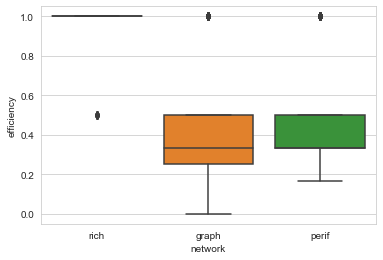

In [71]:
effs = eff_rich+eff_perif+eff_g
ids = ["rich" for i in eff_rich]+\
      ["graph" for i in eff_g]+\
      ["perif" for i in eff_perif]

df = pd.DataFrame({"efficiency":effs,"network":ids})
sns.boxplot(data=df,x="network",y="efficiency")

### Betweenness centrality

The betweenness centrality measures the importance/centrality of node/edge in a graph, by computing the proportion of shortest paths between any pair of nodes that pass through the given node/edge



In [72]:
from networkx.algorithms.centrality import betweenness_centrality
bc_g = pd.Series(betweenness_centrality(g))
bc_rich = bc_g[rich_club]
bc_perif = bc_g[perif]

(0, 0.1)

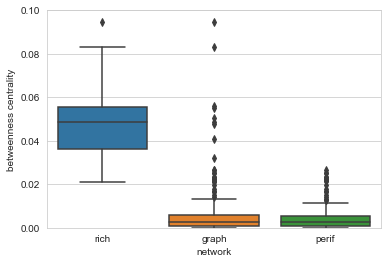

In [73]:
bc = list(bc_rich)+list(bc_g)+list(bc_perif)
ids = ["rich" for i in bc_rich]+\
      ["graph" for i in bc_g]+\
      ["perif" for i in bc_perif]

df = pd.DataFrame({"betweenness centrality":bc,"network":ids})
sns.boxplot(data=df,x="network",y="betweenness centrality")
plt.ylim([0,0.1])

# Communities

In [113]:
def partition2series(partition):
    nodes = set()
    for p in partition:
        nodes = nodes.union(p)
    nodes = list(nodes)
    C = pd.Series(0,index=nodes)
    for i,c in enumerate(partition):
        if len(c)>1:
            C[c] = i+1
    C = C.astype(str)
    return(C)
    
def series2partition(C):
    gb = C.groupby(C.values)
    partition = []
    for x in gb.groups:
        partition.append(tuple(gb.get_group(x).index))
    return(partition)
    
def plot_connectome_communities(C):
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,12))
    for i,row in enumerate(adjacency.values):
        for j,columns in enumerate(row):
            if columns == 1:
                xs = [locations.values[i,0],locations.values[j,0]]
                ys = [locations.values[i,1],locations.values[j,1]]
                plt.plot(xs,ys,color="red",alpha=0.01)
    sns.scatterplot(locations[0],locations[1],alpha=0.4,hue=C,s=200)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Posterior - Anterior(mm)",fontsize=30)
    plt.ylabel("Dorsal - Ventral(mm)",fontsize=30)


#### Girvan-Newman

In [75]:
from networkx.algorithms.community.centrality import girvan_newman
from tqdm.notebook import tqdm
import itertools
k = 40
comp = girvan_newman(g)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
results = []
for communities in tqdm(limited):
    results.append(tuple(sorted(c) for c in communities))

In [76]:
for r in results:
    print([len(rr) for rr in r])

[276, 1]
[275, 1, 1]
[274, 1, 1, 1]
[273, 1, 1, 1, 1]
[272, 1, 1, 1, 1, 1]
[255, 17, 1, 1, 1, 1, 1]
[254, 17, 1, 1, 1, 1, 1, 1]
[169, 85, 17, 1, 1, 1, 1, 1, 1]
[165, 85, 4, 17, 1, 1, 1, 1, 1, 1]
[149, 85, 4, 16, 17, 1, 1, 1, 1, 1, 1]
[144, 85, 5, 4, 16, 17, 1, 1, 1, 1, 1, 1]
[143, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1]
[142, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1]
[141, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1]
[140, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[139, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[138, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[137, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[136, 85, 5, 4, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[135, 85, 5, 4, 16, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[134, 85, 5, 4, 16, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[133, 85, 5, 4, 16, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[131, 85, 5, 4, 16, 1, 1, 17, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1

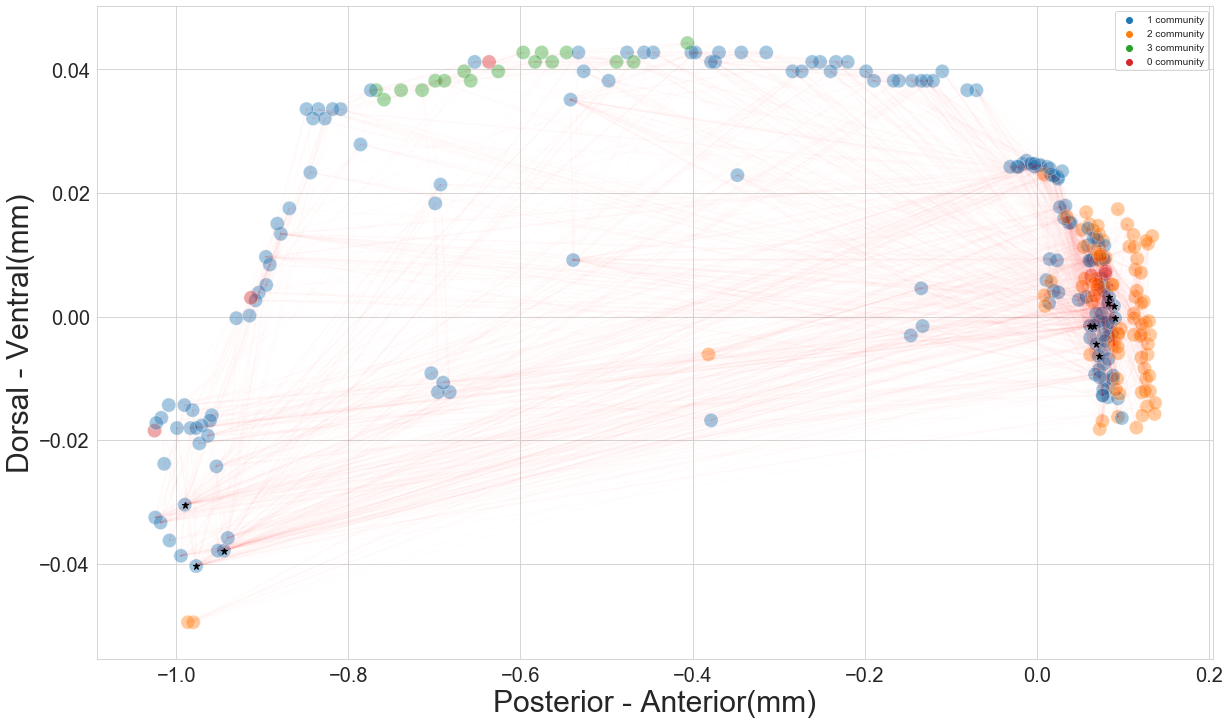

In [147]:
C_gn = partition2series(results[7])+" community"
plot_connectome_communities(C_gn)
plt.plot(rich_neurons_locations[0],rich_neurons_locations[1],"*k",markersize=7)

In [96]:
C_gn[rich_club]

AVAR    1 community
AVAL    1 community
DVA     1 community
PVCR    1 community
AVBL    1 community
AVBR    1 community
AVDL    1 community
AVDR    1 community
AVEL    1 community
AVER    1 community
PVCL    1 community
dtype: object

#### Louvain

In [98]:
from community import best_partition
C_l = best_partition(g)
C_l = pd.Series(partition).astype(str)+" community"


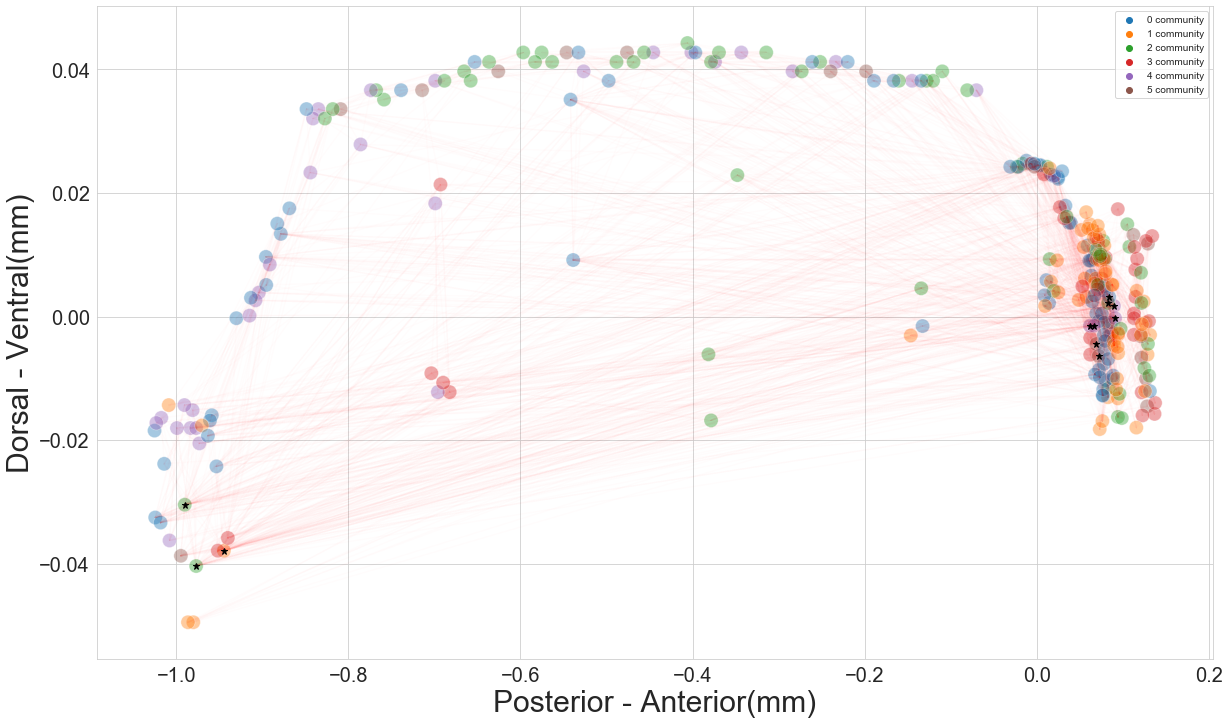

In [146]:
plot_connectome_communities(C_l)
plt.plot(rich_neurons_locations[0],rich_neurons_locations[1],"*k",markersize=7)

In [100]:
C_l[rich_club]

AVAR    4 community
AVAL    4 community
DVA     1 community
PVCR    2 community
AVBL    5 community
AVBR    5 community
AVDL    4 community
AVDR    4 community
AVEL    2 community
AVER    0 community
PVCL    2 community
dtype: object

#### Compare Girvan-Newman and Louvain

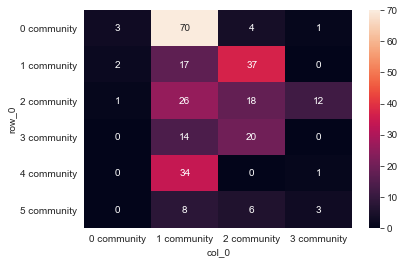

In [118]:
confusion_table = pd.crosstab(C_l.sort_index(),C_gn.sort_index())
sns.heatmap(confusion_table,annot=True)

In [116]:
from networkx.algorithms.community.quality import modularity,performance
modularity(g,results[7]), modularity(g,series2partition(C_l))

(0.09720722268760391, 0.43120637277258594)

In [117]:
from networkx.algorithms.community.quality import performance
performance(g,results[7]), performance(g,series2partition(C_l))

(0.5653220321247319, 0.802568932140428)

### Inter/intra community degrees

In [121]:
def intra_inter_community_degree(G,C):
    intra_community_degree = {}
    inter_community_degree = {}
    for n in g.nodes():
        neighbors = list(g.neighbors(n))
        intra_community_degree[n] = (C[neighbors] == C[n]).sum()
        inter_community_degree[n] = len(neighbors) - intra_community_degree[n]
    res = pd.DataFrame({"intra_community_deg": intra_community_degree, 
                        "inter_community_deg":inter_community_degree})
    return(res)

In [132]:
comm_degrees = intra_inter_community_degree(g,C_l)
rel_comm_degrees = (comm_degrees.T*1./comm_degrees.sum(axis=1)).T

In [134]:
rel_comm_degrees["type"] = "perif"
rel_comm_degrees.loc[rich_club,"type"] = "rich"

Text(0, 0.5, 'Intra-Community degree')

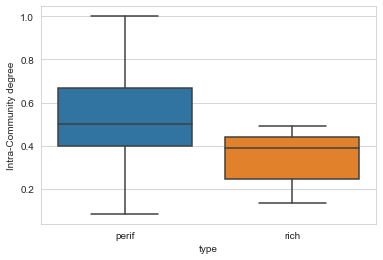

In [143]:
sns.boxplot(data=rel_comm_degrees,x="type",y="intra_community_deg")
plt.ylabel("Intra-Community degree")

Text(0, 0.5, 'Inter-Community degree')

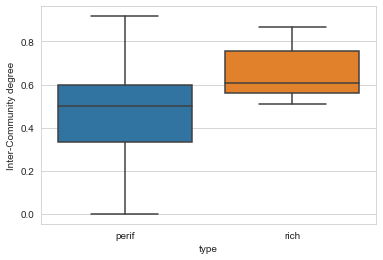

In [144]:
sns.boxplot(data=rel_comm_degrees,x="type",y="inter_community_deg")
plt.ylabel("Inter-Community degree")